In [3]:
import requests
import bs4
import re
from time import sleep
import random
import networkx as nx

When you look at a website using a web browser what you see is a rendered view from an HTML code. This graphical version is much easier for us to read, however, it's not trivial to automatize the process of any data retrieval from it. That's why we will use raw HTML form

The first step is to download the content. We can use a request library. Basic usage is very simple.

In [4]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')
response.status_code # it's wise to check the status code 

200

In [5]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Poznań University of Technology - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"30b5972e-7bc9-4369-b790-195c30fcca26","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Poznań_University_of_Technology","wgTitle":"Poznań University of Technology","wgCurRevisionId":1098380769,"wgRevisionId":1098380769,"wgArticleId":38290,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from April 2020","Articles lacking sources from August 2015","All articles lackin

Working with such a string might be problematic. However, HTML is structured and we can benefit from it. The Beautiful Soup package transforms HTML string into a tree form and allows us to query it in a much more efficient and easier way.

In [6]:
parsed = bs4.BeautifulSoup(response.text)
parsed

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Poznań University of Technology - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"30b5972e-7bc9-4369-b790-195c30fcca26","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Poznań_University_of_Technology","wgTitle":"Poznań University of Technology","wgCurRevisionId":1098380769,"wgRevisionId":1098380769,"wgArticleId":38290,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from April 2020","Articles lacking sources from August 2015","All articles lacking sour

Typically text content is stored in a paragraph element denoted with a 'p' tag. We can take a look at the text from all paragraphs.

In [7]:
for p in parsed.select('p'):
    print(p.getText())



Poznań University of Technology, PUT (Polish name: Politechnika Poznańska) is a university in Poznań, Poland. Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT as in top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995 it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1100 academic staffs.

There are ten faculties:

PUT was officially founded in 1955 and the first recto

## Task1
Implement a function getText(url) 
 - download content from a given url
 - transform it using bs
 - return text from all paragraphs

In [8]:
def getText(url):
    output = ""
    
    resp = requests.get(url)
    parsed = bs4.BeautifulSoup(response.text)
    
    print(resp.status_code)
    
    for p in parsed.select('p'):
        output += p.getText() + "\n"
    
    return print(output)

In [9]:
getText('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

200


Poznań University of Technology, PUT (Polish name: Politechnika Poznańska) is a university in Poznań, Poland. Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT as in top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995 it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1100 academic staffs.

There are ten faculties:

PUT was officially founded in 1955 and the first r

In [10]:
getText("http://wp.pl")

200


Poznań University of Technology, PUT (Polish name: Politechnika Poznańska) is a university in Poznań, Poland. Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT as in top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995 it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1100 academic staffs.

There are ten faculties:

PUT was officially founded in 1955 and the first r

Nowadays websites are more often dynamic, not static. Working with them would require dealing with javascript. It's possible and there are python packages supporting this processing but we will not cover them in this course.

In [11]:
getText("http://facebook.com")

200


Poznań University of Technology, PUT (Polish name: Politechnika Poznańska) is a university in Poznań, Poland. Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT as in top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995 it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1100 academic staffs.

There are ten faculties:

PUT was officially founded in 1955 and the first r

## Task 2
Extract number of students from infobox table

In [12]:
parsed.find('table')

<table class="box-Unreferenced plainlinks metadata ambox ambox-content ambox-Unreferenced" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>does not <a href="/wiki/Wikipedia:Citing_sources" title="Wikipedia:Citing sources">cite</a> any <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">sources</a></b>.<span class="hide-when-compact"> Please help <a class="external text" href="https:

In this task, you have to extract specific information from a specific table. The table we are interested in is of class infobox and bs allows us to use this information.

In [13]:
parsed.find('table', class_="infobox")

<table class="infobox vcard"><caption class="infobox-title fn org" style="font-size:125%;">Poznań University of Technology</caption><tbody><tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr><tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wik

Since bs creates a tree structure you can navigate through it and use methods find and find_all on the next nodes.

In [14]:
parsed.find('table', class_="infobox").find_all("tr")

[<tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr>,
 <tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" title="Rector (academia)">Rector</a></th><td class="infobox-data">PhD, Prof. Teofil Jesionowski</td></

In [15]:
parsed.find('table', class_="infobox").find_all("tr")[6]

<tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Students</th><td class="infobox-data">21,000</td></tr>

In [16]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('th').text

'Students'

In [17]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('td').text

'21,000'


Write a function that returns the number of students from the infobox table from the provided URL. You can use inspect tool.

In [18]:
import inspect

In [19]:
def getStudentCount(url):
    resp = requests.get(url)
    parsed = bs4.BeautifulSoup(resp.text)
    check = parsed.find('table', class_="infobox").find_all("tr")

    for i in check:
        tag = i.th
        if tag is not None:
            if tag.string == "Students":
                return int(i.td.string.replace(',', ''))


In [20]:
assert getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology") == 21000

In [21]:
assert getStudentCount("https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology") == 28314

# Regex
Regular expression is a scheme for defining patterns to be found in a text

Let's try it  https://regexone.com/

## Task 3

We can also retrieve URLs and once we have them we can scrape them as well.

In [22]:
parsed.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a>,
 <a href="/wiki/Wikipedia:Citing_sources" title="Wikipedia:Citing sources">cite</a>,
 <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">sources</a>,
 <a class="external text" href="https://en.wikipedia.org/w/index.php?title=Pozna%C5%84_University_of_Technology&amp;action=edit">improve this article</a>,
 <a href="/wiki/Help:Referencing_for_b

It's important to add some delay between accessing the next page. Otherwise, you might cause too much traffic and be temporarily banned

In [61]:
links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
random.shuffle(links)
for link in links[:10]:
    print(link['href'])
    response = requests.get("https://en.wikipedia.org" + link['href'])
    print(response.status_code)
    sleep(random.random()*3)

/wiki/Nicolaus_Copernicus_University_in_Toru%C5%84
200
/wiki/Wikipedia:File_Upload_Wizard
200
/wiki/Rzesz%C3%B3w_University_of_Technology
200
/wiki/Category:Articles_with_ISNI_identifiers
200
/wiki/Help:Contents
200
/wiki/Help:Maintenance_template_removal
200
/wiki/University_of_Technology_and_Life_Sciences_in_Bydgoszcz
200
/wiki/File:Politechnika_Pozna%C5%84ska-1.jpg
200
/wiki/File:2005063030_(Politechnika_Pozna%C5%84ska,_Centrum_Wyk%C5%82adowo-Konferencyjne).png
200
/wiki/Special:WhatLinksHere/Pozna%C5%84_University_of_Technology
200


In [62]:
def dfs(link):
    resp = requests.get(link)
    parsed = bs4.BeautifulSoup(resp.text)
    
    links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})
    
    
        
    print_output(links)
    
def print_output(data):
    if isinstance(data, NavigableString): ## NavigableString has no children, i.e., stop iteration
        print(data)
        return

    for link in links[:10]:
        print_output(link)

In [58]:
dfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

RecursionError: maximum recursion depth exceeded while calling a Python object

write BFS with printing current link

In [ ]:
def bfs(link):
    


## Networkx

It's a package for working with various networks

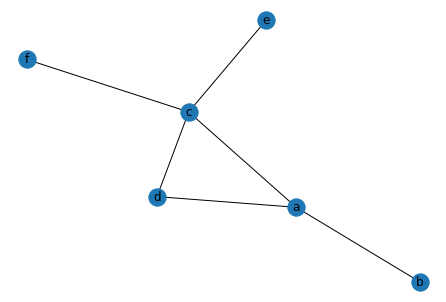

In [63]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")

nx.draw(G, with_labels=True)


Can you plot a graph of Wikipedia links? Extend the bfs function by plotting a network.

# Scrapy

Scrapy is an efficient library for web crawling and scraping. It has a slightly higher entrance level than requests + bs but it's much easier for complex tasks.

In [64]:
import requests
import bs4
import re
from time import sleep
import random

import scrapy
from scrapy.crawler import CrawlerProcess

In [65]:
class MySpider(scrapy.Spider):
    name = "lab1"

    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        quotes = response.css('div.quote')
        for quote in quotes: # you can extract data you need
            yield {
                'text': quote.css('.text::text').get(),
                'author': quote.css('.author::text').get(),
            }

        next_page = response.css('li.next a::attr(href)').get() #find next URL

        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse) #and process it

In [66]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider)
process.start() 

2022-10-11 17:11:29 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: scrapybot)
2022-10-11 17:11:29 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Windows-10-10.0.22000-SP0
2022-10-11 17:11:29 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2022-10-11 17:11:29 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-10-11 17:11:29 [scrapy.extensions.telnet] INFO: Telnet Password: 12abd3f1e62a8b04
2022-10-11 17:11:29 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2022-10-11 17:11:30 [scrapy.middleware] INFO: Enabled downloader middlewares:
[

2022-10-11 17:11:31 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/2/>
{'text': '“It is not a lack of love, but a lack of friendship that makes unhappy marriages.”', 'author': 'Friedrich Nietzsche'}
2022-10-11 17:11:31 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/2/>
{'text': '“Good friends, good books, and a sleepy conscience: this is the ideal life.”', 'author': 'Mark Twain'}
2022-10-11 17:11:31 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/2/>
{'text': '“Life is what happens to us while we are making other plans.”', 'author': 'Allen Saunders'}
2022-10-11 17:11:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://quotes.toscrape.com/page/3/> (referer: http://quotes.toscrape.com/page/2/)
2022-10-11 17:11:32 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/3/>
{'text': '“I love you without knowing how, or when, or from where. I love you simply, without pr

2022-10-11 17:11:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://quotes.toscrape.com/page/6/> (referer: http://quotes.toscrape.com/page/5/)
2022-10-11 17:11:33 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/6/>
{'text': '“There is nothing I would not do for those who are really my friends. I have no notion of loving people by halves, it is not my nature.”', 'author': 'Jane Austen'}
2022-10-11 17:11:33 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/6/>
{'text': '“Do one thing every day that scares you.”', 'author': 'Eleanor Roosevelt'}
2022-10-11 17:11:33 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/6/>
{'text': '“I am good, but not an angel. I do sin, but I am not the devil. I am just a small girl in a big world trying to find someone to love.”', 'author': 'Marilyn Monroe'}
2022-10-11 17:11:33 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/6/>
{'tex

2022-10-11 17:11:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://quotes.toscrape.com/page/9/> (referer: http://quotes.toscrape.com/page/8/)
2022-10-11 17:11:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/9/>
{'text': '“Anyone who has never made a mistake has never tried anything new.”', 'author': 'Albert Einstein'}
2022-10-11 17:11:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/9/>
{'text': "“A lady's imagination is very rapid; it jumps from admiration to love, from love to matrimony in a moment.”", 'author': 'Jane Austen'}
2022-10-11 17:11:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com/page/9/>
{'text': '“Remember, if the time should come when you have to make a choice between what is right and what is easy, remember what happened to a boy who was good, and kind, and brave, because he strayed across the path of Lord Voldemort. Remember Cedric Diggory.”', 'author': 'J.K. Rowling

<details>

<summary>Bonus</summary>

Funny website for scraping https://sirius.cs.put.poznan.pl/~inf66204/WKC.html
</details>